> Data visualization: EEG Signal Preview

# Import data 

In [1]:
# import some relative packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Transform 100 txt files into one csv file

In [2]:
# show how to convert 100 txt file into a single csv file
Path= './set_convert/Z/'
list_ = []
for filename in os.listdir(Path):
    file_route = os.path.join(Path,filename) 
    column_name = os.path.splitext(filename)[0]
    df = pd.read_csv(file_route,header=None,names=[column_name])
    list_.append(df)

# use pandas.concat function to concatenate the list into a dataframe
# next time we can read the set.csv directly.
Z_frames = pd.concat(list_,axis=1)
Z_frames.to_csv('./set_convert/Zset.csv')

## Read data to DataFrame

In [3]:
# read data
# In this step 
# according data set path and set name

def read_data_set(set_path,set_name):
    file_path = os.path.join(set_path,set_name)
    set_data = pd.read_csv(file_path,header=0,index_col=0)
    return set_data

set_path = './raw_data/'
set_names= ['Zset.csv','Oset.csv','Nset.csv','Fset.csv','Sset.csv']


set_dfs=[]
for set_name in set_names:
    set_dfs.append(read_data_set(set_path,set_name))


In [4]:
# # let's have a look the dataframe
Zset_df = set_dfs[0]
Zset_df.head()

,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009,Z010,...,Z091,Z092,Z093,Z094,Z095,Z096,Z097,Z098,Z099,Z100
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,13,40,-19,-45,6,-133,-3,-51,56,-36
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,30,48,-1,-62,-6,-144,-3,-42,55,-71
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,42,35,33,-76,-8,-113,-12,-39,38,-120
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,56,5,51,-98,-6,-74,-24,-47,-5,-150
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,56,-40,49,-108,15,-41,-34,-51,-47,-160


# Clean Data

In [5]:
for index,set_df in enumerate(set_dfs):
    if set_df.isnull().any().any():
        print("Find null value in dataset{:d}.format(index)")
    else:
        print("There is no null value in dataset{:d}".format(index))
    

There is no null value in dataset0
There is no null value in dataset1
There is no null value in dataset2
There is no null value in dataset3
There is no null value in dataset4


In [6]:
cleaned_set_dfs=[]
for set_df in set_dfs:
    cleaned_set = set_df.fillna(method='ffill')
    cleaned_set_dfs.append(cleaned_set)

cleaned_set_dfs[0].head()

,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009,Z010,...,Z091,Z092,Z093,Z094,Z095,Z096,Z097,Z098,Z099,Z100
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,13,40,-19,-45,6,-133,-3,-51,56,-36
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,30,48,-1,-62,-6,-144,-3,-42,55,-71
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,42,35,33,-76,-8,-113,-12,-39,38,-120
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,56,5,51,-98,-6,-74,-24,-47,-5,-150
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,56,-40,49,-108,15,-41,-34,-51,-47,-160


# Select the series which has the maximum standard deviation

In [7]:
# for previw we choose the column which has the maximun std in the dataset for the representative
# get the column which has the maxmium std
def get_max_std_col(df):
    
    max_std_col_name = df.std().idxmax()
    return df[max_std_col_name]


# a list for store the 5 selected series
rep_series_set = []

for set_df in cleaned_set_dfs:
    rep_series_set.append(get_max_std_col(set_df))


In [8]:
tmp_series = rep_series_set[0]
tmp_series.describe()

count    4097.000000
mean        1.284110
std        55.900217
min      -224.000000
25%       -34.000000
50%         3.000000
75%        38.000000
max       196.000000
Name: Z039, dtype: float64

# Data visualizaiton

## Define plot function

In [9]:
# 1)	The amplitude of the signal is nominal.
# 2)	The index of the signal is ordinal.
# 3)	A typical temporal data.
# 4)	Discrete series.
# 5)	Only one dimension.


def series_plot(ax,rep_series):
    
    # Since we need some nummerical characters: mean, 1st and 3re quartils.
    series_disc = rep_series.describe()
    series_mean = series_disc['mean']
    series_std = series_disc['std']
    series_min = series_disc['min']
    series_1stq = series_disc['25%']
    series_median = series_disc['50%']
    series_3rdq = series_disc['75%']
    series_max = series_disc['max']
    
   
    # Axes Format: 
    # Since the ylim of every datasets are different, so just set the xlim.
    ax.set_xlim(left=0,right=4100)
    
 
    # plot points： four lines: series point
    ax.plot(rep_series.index,rep_series.values,linewidth=0.4,color='k',label="Signal")
    ax.axhline(y=series_3rdq,linewidth=1.2,linestyle='--',color='k',label="3rd Quartile")
    ax.axhline(y=series_median,linewidth=1.2,linestyle='-',color='k',label="Median")
    ax.axhline(y=series_1stq,linewidth=1.2,linestyle='-.',color='k',label="1st Quartile")

           
    # Legend ,label and ticks
    ax.legend(loc='upper right',bbox_to_anchor=(1,1.18),ncol=4,fontsize=14.0,edgecolor="black")
    
    ax.set_xlabel("Time Points",fontsize=18.0)
    ax.set_ylabel("Amplitude",fontsize=18.0)
    
    ax.tick_params(axis='both',labelsize=14.0)
    
    
    # Annotation for maximum and minimum value point 
    offset_unit = 5
    max_point_x, max_point_y = rep_series.idxmax(), int(series_max)
    min_point_x, min_point_y = rep_series.idxmin(), int(series_min)
    ax.scatter([max_point_x,min_point_x],[max_point_y,min_point_y],marker="x",s=50, c='k')
    
    max_annotation_str = 'Max Point\nx:{:d}, y:{:d}'.format(max_point_x,max_point_y)
    min_annotation_str = 'Min Point\nx:{:d}, y:{:d}'.format(min_point_x,min_point_y)
         
    bbox = dict(boxstyle="round",fc='none',ec='black')
    arrowprops=dict(arrowstyle='->')
    ax.annotate(max_annotation_str,xy=(max_point_x,max_point_y), 
                xytext=(4*offset_unit,-6*offset_unit), 
                textcoords='offset points',fontsize=14.0, 
               arrowprops=arrowprops,bbox=bbox)
    ax.annotate(min_annotation_str,xy=(min_point_x,min_point_y), 
                xytext=(6*offset_unit,0),
                textcoords='offset points',fontsize=14.0,
              bbox=bbox,arrowprops=arrowprops)
  


     #Title : data segments name/mean/standard deviation
    title = r'{}: $\mu = {:.2f}$, $\sigma = {:.2f}$'.format(rep_series.name,series_mean,series_std)
    ax.set_title(title,loc='left',fontsize=20)



## Plot show 

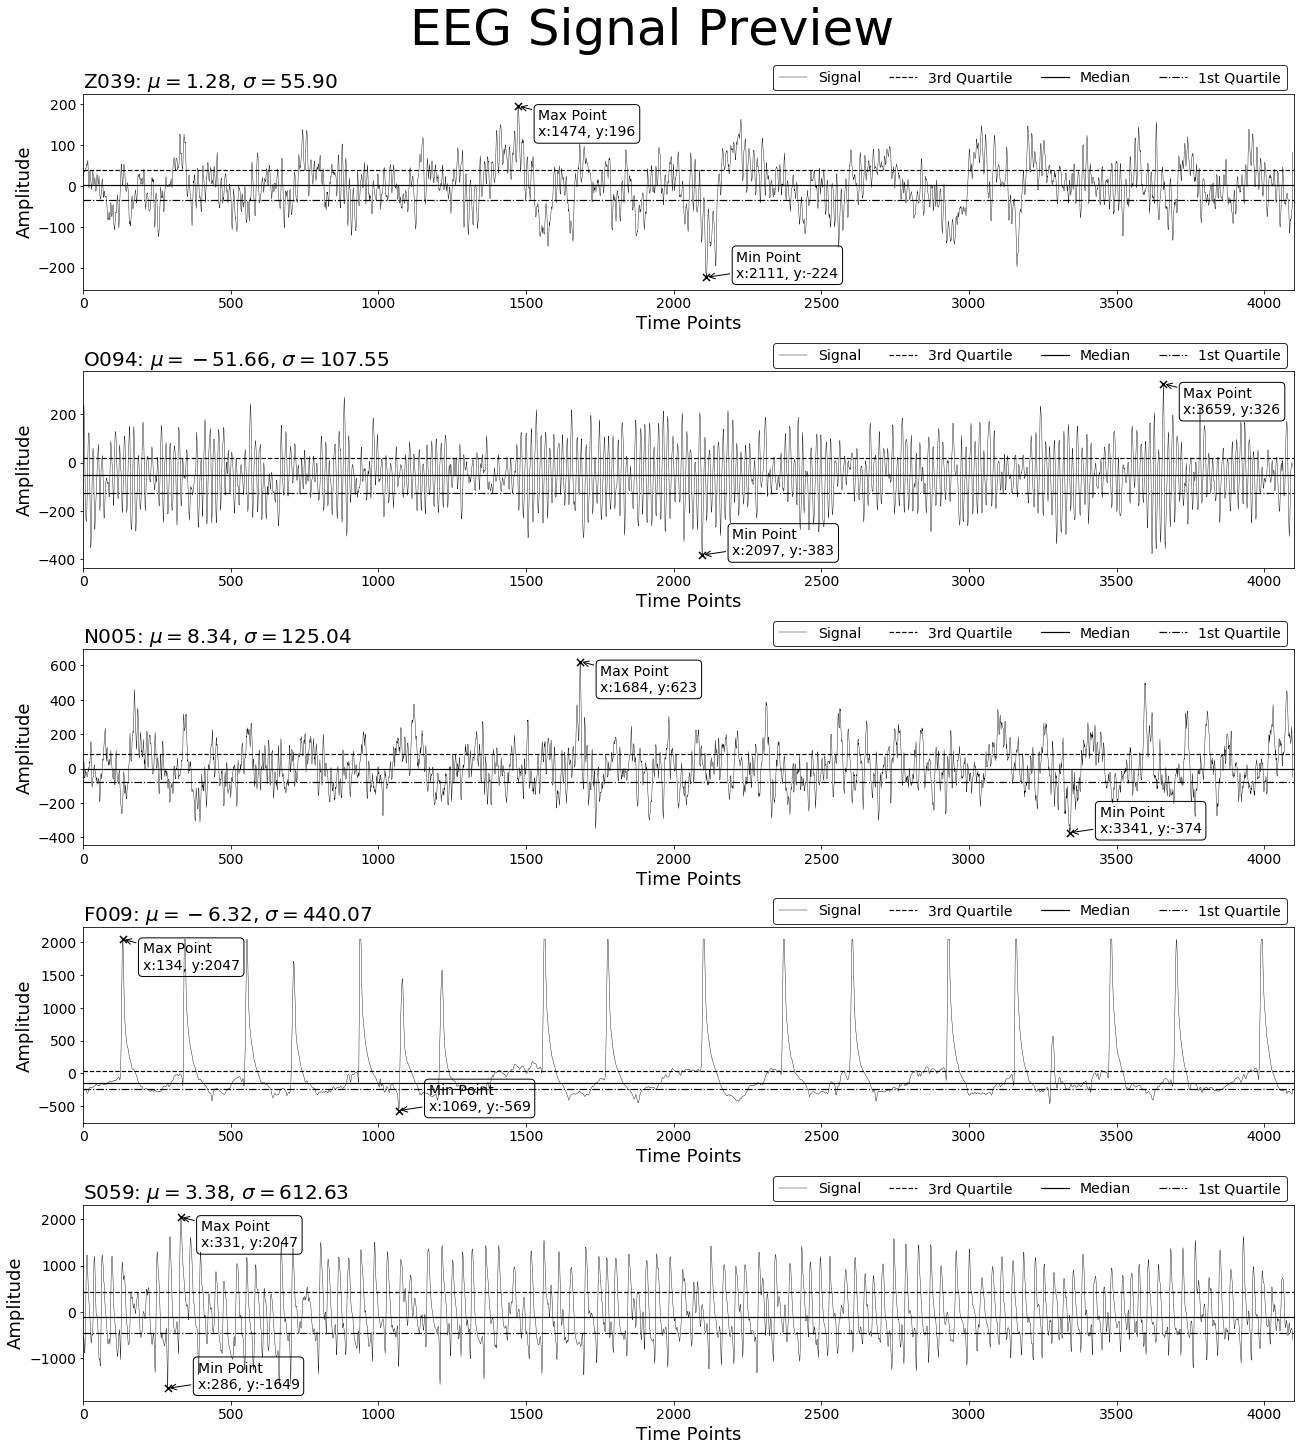

In [10]:
# use Grid Axes to arrange the figure.
widths = [4]
heights = [1,1,1,1,1] 

gs_kw = dict(width_ratios=widths,height_ratios=heights)
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=[18,20],
                        constrained_layout=True,gridspec_kw = gs_kw)

main_title = "EEG Signal Preview"
fig.suptitle(main_title,y=1.0,fontsize=50)

# Plot
for i in range(len(rep_series_set)):
    
    series_plot(axes[i],rep_series_set[i])

    
plt.show()


# Save figure

In [11]:
figure_name = "./raw_data/EEG_Signal_Preview"
fig.savefig(figure_name)